In [1]:
# The code was removed by DSX for sharing.

,Customer,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Town
0,QZ44356,6979,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131,Four-Door Car,Medsize,New York
1,WW63253,7645,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529,SUV,Medsize,San Francisco
2,SX51350,4738,No,Basic,College,2/21/2011,Unemployed,M,0,Suburban,...,0,3,Personal Auto,Personal L3,Offer1,Agent,482,Four-Door Car,Small,San Francisco
3,VQ65197,8197,No,Basic,College,1/6/2011,Unemployed,F,0,Suburban,...,0,3,Personal Auto,Personal L3,Offer2,Agent,528,SUV,Medsize,San Francisco
4,TZ98966,2450,No,Basic,Bachelor,2/24/2011,Unemployed,F,0,Suburban,...,3,1,Corporate Auto,Corporate L3,Offer1,Branch,554,Four-Door Car,Medsize,New York


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
Customer Lifetime Value          9134 non-null int64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Open Complaints                  9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      913


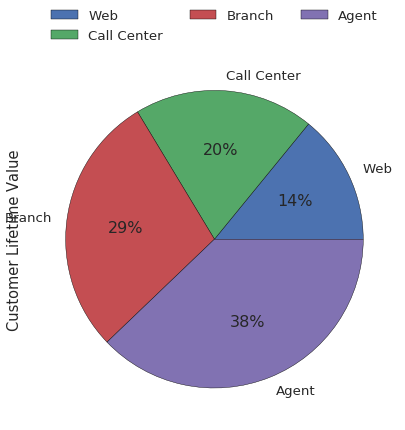

In [3]:
# !pip install --user --upgrade pixiedust
import pixiedust
display(df)

## Exploring accepted renewals

In [4]:
renewals = df[df ['Response'] == "Yes"  ]
renewals = renewals [ ['Customer Lifetime Value', 'Number of Policies', 'Renew Offer Type','Coverage','Income','Monthly Premium Auto','Sales Channel','Vehicle Size','Vehicle Class','Months Since Policy Inception','Location Code','Open Complaints']]
renewals.tail()

,Customer Lifetime Value,Number of Policies,Renew Offer Type,Coverage,Income,Monthly Premium Auto,Sales Channel,Vehicle Size,Vehicle Class,Months Since Policy Inception,Location Code,Open Complaints
9123,8819,8,Offer2,Basic,99845,110,Branch,Medsize,SUV,25,Suburban,1
9124,8819,8,Offer2,Basic,99845,110,Branch,Medsize,SUV,25,Suburban,1
9125,8819,8,Offer2,Basic,99845,110,Branch,Medsize,SUV,25,Suburban,1
9126,8819,8,Offer2,Basic,99845,110,Branch,Medsize,SUV,25,Suburban,1
9127,8819,8,Offer2,Basic,99845,110,Branch,Medsize,SUV,25,Suburban,1


# Ranking offers by value: Offer1 < Offer2 < Offer3

In [5]:
# print (renewals)
offerscore = [] 
for customer in renewals['Renew Offer Type']:
#for customer in renewals :
    # print (customer)
    if (customer == "Offer1"): 
        score=1
    elif (customer == "Offer2"): 
        score=2
    else :
        score=3
    offerscore.append(score)
#print (offerscore)
    #print renewals
renewals ['Offers Score']= offerscore
renewals.head()

,Customer Lifetime Value,Number of Policies,Renew Offer Type,Coverage,Income,Monthly Premium Auto,Sales Channel,Vehicle Size,Vehicle Class,Months Since Policy Inception,Location Code,Open Complaints,Offers Score
14,6846,5,Offer1,Extended,0,95,Call Center,Large,Two-Door Car,20,Suburban,0,1
18,8002,3,Offer1,Basic,0,107,Agent,Medsize,SUV,65,Suburban,0,1
19,2393,1,Offer1,Basic,0,70,Branch,Medsize,Four-Door Car,10,Suburban,0,1
30,3731,1,Offer1,Extended,0,96,Agent,Large,Four-Door Car,34,Suburban,0,1
32,3885,1,Offer1,Premium,0,105,Branch,Large,Four-Door Car,92,Suburban,0,1


## Looking for correlations

In [6]:
#!pip install --user seaborn
# !pip install --user matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)
# numeric = renewals.dtypes[df.dtypes!='object'].index # qulckly filter columns by numeric / non-numeric
#df_num = renewals[numeric[:16]]                      # and exclude all the genre binary columns
df_num = renewals[-1000:]




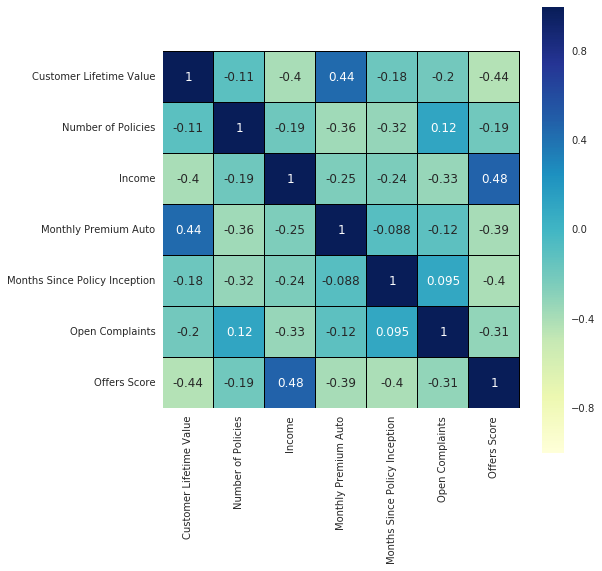

In [7]:
# create a correlation matrix
corr_mat=df_num.corr(method='pearson')
plt.figure(figsize=(8,8))

sns.heatmap(corr_mat.corr(),linewidths=0.25,vmax=1.0,\
            square=True, cmap="YlGnBu", linecolor='black', annot=True)
plt.show()

## Found a Strong correlation between Accepted Offers and Income


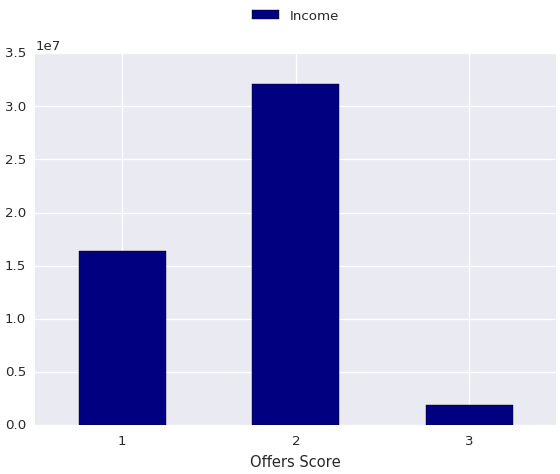

In [8]:
display(renewals)

## Most accepted offer is Offer2. Let's zoom on the clients who accepted it

In [10]:
display(offers2)

NameError: name 'offers2' is not defined

## Clients who accepted Offer2 mostly have 2 and 4 door cars: we will target them

## Let's look what other correlations we find for those clients

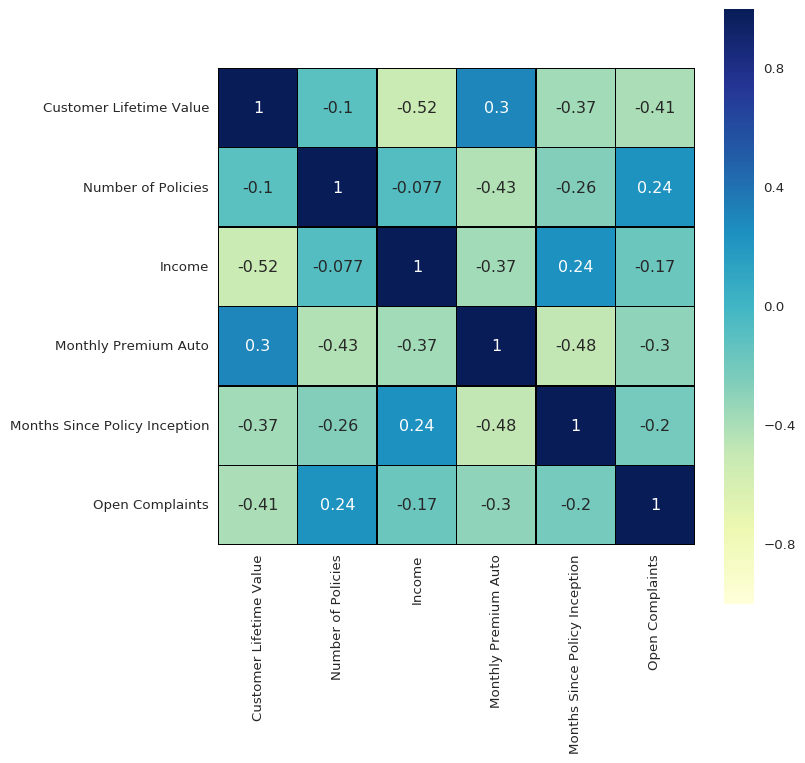

In [11]:
offers2 = renewals[renewals ['Renew Offer Type'] == "Offer2"  ]
del offers2['Offers Score']
# create a correlation matrix
corr_mat=offers2.corr(method='pearson')
plt.figure(figsize=(8,8))

sns.heatmap(corr_mat.corr(),linewidths=0.25,vmax=1.0,\
            square=True, cmap="YlGnBu", linecolor='black', annot=True)
plt.show()

## There's a correlation with # of open complaints. Let's draw the correlation vs CLV chart


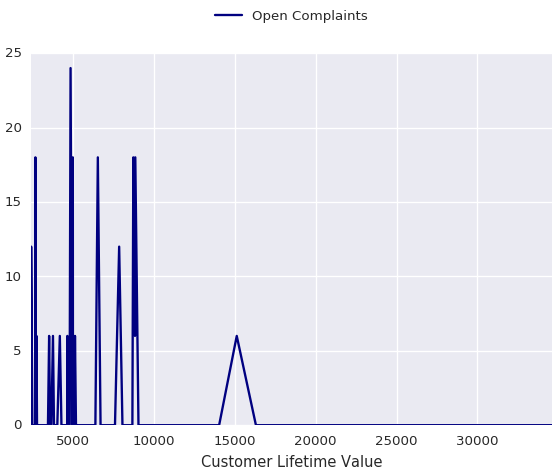

In [12]:
display(offers2)

## We should avoid low value customers which have many accidents. Sweet spot is > 10000

## Where do they live?


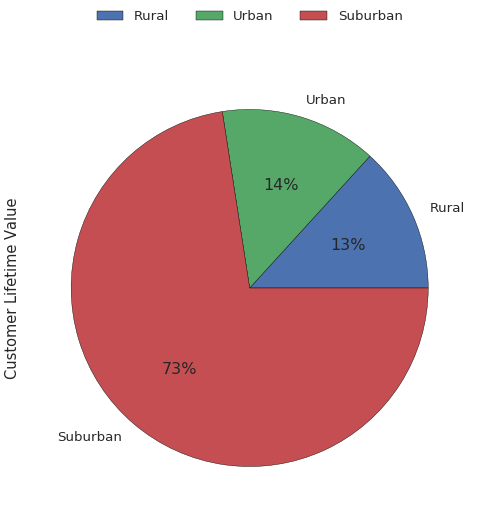

In [13]:
display(offers2)

## They are mostly suburban

## Let's prepare our new campaign: customers who did'nt accept Offer2, that are Suburban, LTV > 10000 and owners of 2-4 doors

In [14]:

selection = ((df ['Renew Offer Type'] != "Offer2") & 
    (df['Location Code'] == "Suburban") &
    ((df['Vehicle Class'] == "Four-Door Car") | (df['Vehicle Class'] == "Two-Door Car")) &
    (df['Customer Lifetime Value'] > 10000) &
    (df['EmploymentStatus'] != "Unemployed")   
            )


target = df[selection]

target.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 2321 to 9069
Data columns (total 24 columns):
Customer                         232 non-null object
Customer Lifetime Value          232 non-null int64
Response                         232 non-null object
Coverage                         232 non-null object
Education                        232 non-null object
Effective To Date                232 non-null object
EmploymentStatus                 232 non-null object
Gender                           232 non-null object
Income                           232 non-null int64
Location Code                    232 non-null object
Marital Status                   232 non-null object
Monthly Premium Auto             232 non-null int64
Months Since Last Claim          232 non-null int64
Months Since Policy Inception    232 non-null int64
Open Complaints                  232 non-null int64
Number of Policies               232 non-null int64
Policy Type                      232 non-null obje

## We found a list of 232 prospects to retarget for Offer2. Here's the list:

In [15]:
target.head()

,Customer,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Town
2321,LM83004,12552,No,Basic,High School or Below,1/27/2011,Disabled,M,10147,Suburban,...,0,2,Personal Auto,Personal L3,Offer4,Branch,459,Four-Door Car,Medsize,Atlanta
2358,KB20508,10828,No,Extended,College,1/17/2011,Medical Leave,M,11033,Suburban,...,0,2,Special Auto,Special L1,Offer1,Branch,511,Two-Door Car,Large,Dallas
2362,SB82356,30591,No,Extended,Bachelor,1/29/2011,Retired,F,11276,Suburban,...,1,2,Corporate Auto,Corporate L2,Offer1,Agent,436,Four-Door Car,Medsize,New York
2372,WQ25142,21528,No,Extended,Bachelor,2/18/2011,Disabled,M,11538,Suburban,...,0,2,Corporate Auto,Corporate L3,Offer3,Call Center,393,Four-Door Car,Medsize,Dallas
2377,PG90331,18635,No,Basic,College,2/14/2011,Disabled,M,11656,Suburban,...,0,2,Personal Auto,Personal L2,Offer3,Agent,336,Two-Door Car,Medsize,Dallas
